In [106]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import calendar
import numpy as np
import seaborn as sns

In [107]:
def read_facebook_timeline_data():
    """
    This function reads in the appropriate html file for timeline information
    """
    with open('../Assignment_4-Text_Analytics/html/timeline.htm') as f:
        soup = BeautifulSoup(f, "lxml")
    return soup

In [108]:
def clean_timeline():
    """
    Calls the read_facebook_timeline_data function, and then strips 
    data of all html tags. Once done this creates the information for 
    usage across days of the week, month of the year and year.
    """
    soup = read_facebook_timeline_data()
    timeline_info = soup.find_all("div", class_ = 'meta')
    clean_timeline = []
    for i in timeline_info:
        clean_timeline.append(re.sub(r'<.+?>', '', str(i)))
    clean_new_timeline = []
    for i in clean_timeline:
        clean_new_timeline.append([x.strip() for x in i.split(',')])
    days_information = [item[0] for item in clean_new_timeline]
    days = dict(Counter(days_information))
    list_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for k in list_of_days:
        if k not in days:
            days[k] = 0
        else:
            pass
    days = pd.DataFrame.from_dict(days, orient = 'index').reset_index().rename(columns = {'index': 'Days', 0:'Count'})
    date_information = [item[1] for item in clean_new_timeline]
    clean_new_date = []
    for i in date_information:
        clean_new_date.append([x.strip() for x in i.split('at')])
    date_information = [item[0] for item in clean_new_date]
    date = pd.DataFrame(np.array(date_information), columns= {'Date'})
    date['Date'] = pd.to_datetime(date['Date'])
    month = date['Date'].groupby([date.Date.dt.month]).agg('count')
    month = pd.DataFrame(month).rename(columns = {'Date': 'Count'}).reset_index()
    month['Date'] = month['Date'].apply(lambda x: calendar.month_abbr[x])
    year = date['Date'].groupby(date.Date.dt.year).agg('count')
    year = pd.DataFrame(year).rename(columns = {'Date': 'Count'}).reset_index()
    return days, month, year

In [109]:
def plot(df, x,y, xlabel, ylabel, title, fig_size, fig_color):
    """
    Standard helper plot function
    """
    fig,ax= plt.subplots(nrows=1)
    ax.bar(df[x],df[y], color = fig_color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
#    plt.xticks(df[x], label)
    fig.set_size_inches(fig_size)
    return

In [110]:
days, month, year = clean_timeline()

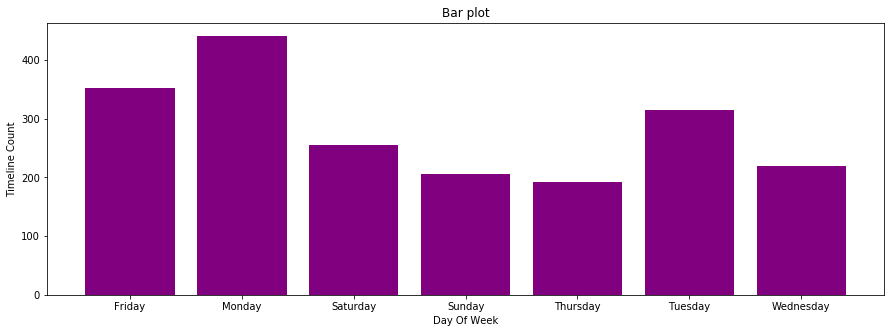

In [111]:
plot(days, 'Days', 'Count', 'Day Of Week', 'Timeline Count', 
    'Bar plot', (15,5), 'purple')
plt.show()

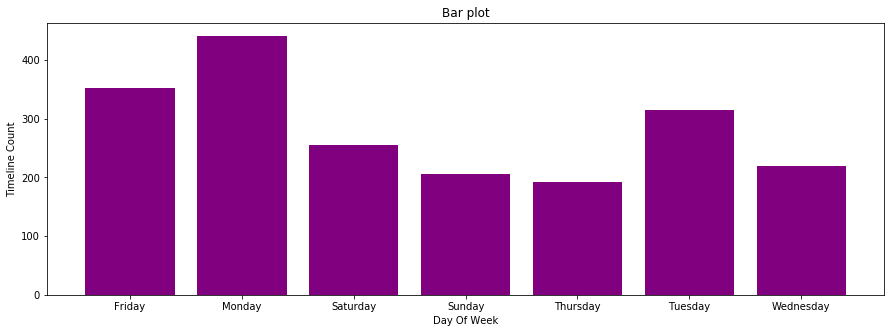

In [112]:
plot(days, 'Days', 'Count', 'Day Of Week', 'Timeline Count', 
    'Bar plot', (15,5), 'purple')

plt.show()

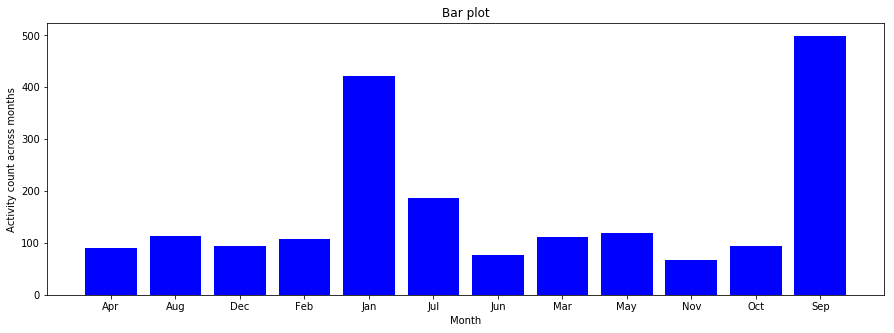

In [114]:

plot(month, 'Date', 'Count', 'Month', 'Activity count across months', 'Bar plot',
        (15,5), 'blue')
plt.show()

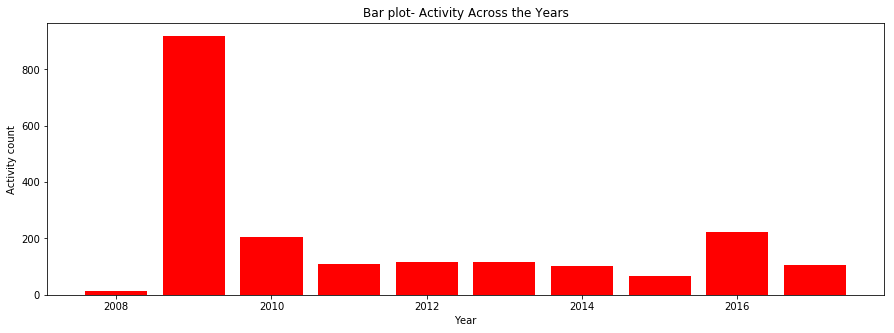

In [115]:
plot(year, 'Date', 'Count', 'Year', 'Activity count', 'Bar plot- Activity Across the Years',
        (15,5), 'red')
plt.show()

In [116]:
def read_facebook_friends_data():
    """
    This function reads in the appropriate html file for friends information
    """
    with open('../Assignment_4-Text_Analytics/html/friends.htm') as f:
        soup = BeautifulSoup(f, "lxml")
    return soup

In [117]:
def clean_friends():
    """
    Calls the read_facebook_friends_data function, and then strips 
    data of all html tags. Once done this creates the information for 
    friends made across the years.
    """
    soup = read_facebook_friends_data()
    friends_info = soup.find_all('div', class_ = 'contents')
    clean_friends = []
    for i in friends_info:
        clean_friends.append(re.sub(r'<.+?>', '', str(i)))
    clean_new_timeline = []
    for i in clean_friends:
        clean_new_timeline.append([x.strip() for x in i.split('Sent Friend Requests')])
    temp = [item[0] for item in clean_new_timeline]
    clean = []
    for i in temp:
        clean.extend(re.findall('\(.*?\)',i))
    clean_new = []
    for i in clean:
        clean_new.append(i.strip('()'))
    the_new_list = [x.split(',') for x in clean_new]
    new =[]
    for l in range(len(the_new_list)):
        k = [x.split(' ') for x in the_new_list[l]]
        if len(k[0]) == 2:
            k[0].append('2017')
        new.append(k[0])
    clean_df = pd.DataFrame(new).rename(columns = {0:'Date', 1:'Month', 2:'Year'})
    year = clean_df.groupby('Year').agg('count')
    year = year.reset_index()
    return year

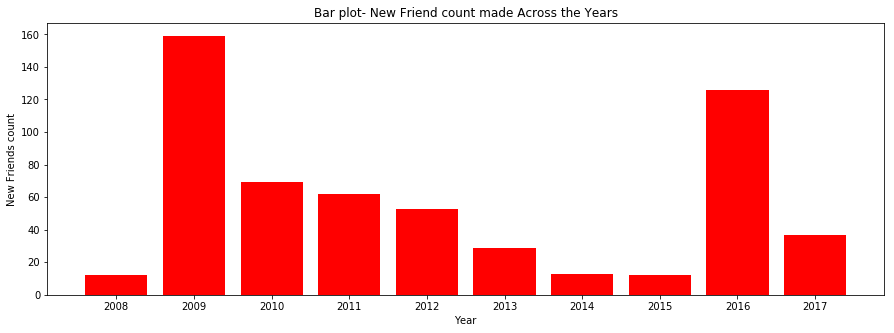

In [118]:
year = clean_friends()
plot(year, 'Year', 'Date', 'Year', 'New Friends count', 'Bar plot- New Friend count made Across the Years',
        (15,5), 'red')
plt.show()